In [27]:
import os
import numpy as np
import lsst.sims.skybrightness as sb
import lsst.sims.ocs
from lsst.sims.utils import altAzPaFromRaDec, ObservationMetaData

In [28]:
field_dict = {}
with open("tessellationFields") as fh:
    field_id = 1
    for line in fh:
        line = line.strip()
        # Skip blank line
        if not line:
            continue
        # Skip comment lines
        if line.startswith("#"):
            continue
        values = (float(x) for x in line.split())
        field = lsst.sims.ocs.configuration.Field(field_id, 3.5, *values)
        field_dict[field_id] = field
        field_id += 1
ra = np.array([field.ra for _, field in field_dict.iteritems()])
dec = np.array([field.dec for _, field in field_dict.iteritems()])

In [29]:
# Default is LSST observatory and preciseAltAz off but give back LSST filter magnitudes 
sm = sb.SkyModel(mags=True)

In [62]:
# New moon (1/1-2/2022)
#mjd_start_twi = 59581.041666666664
#mjd_end_twi = 59581.35625
# Full moon (1/17-18/2022)
mjd_start_twi = 59597.040972222225
mjd_end_twi = 59597.36736111111

visit_time = 0.0004629630711860955

mjds = []
mjd = mjd_start_twi
while mjd < mjd_end_twi:
    mjds.append(mjd)
    mjd += visit_time

In [63]:
stats = []
for n, mjd in enumerate(mjds):
    #print(mjd)
    obs = ObservationMetaData(mjd=mjd)
    #print(ra)
    alt, az, pa = altAzPaFromRaDec(ra, dec, obs)
    #print(alt)
    #alt_mask = np.where((1.0/np.cos(np.radians(90.-alt))) < 2.5) 
    alt_mask = np.where(alt > 20.0)
    #print(alt_mask)
    up_ra = ra[alt_mask]
    up_dec = dec[alt_mask]
    up_alt = alt[alt_mask]
    up_az = az[alt_mask]
    sm.setRaDecMjd(up_ra, up_dec, mjd, degrees=True)
    mags = sm.returnMags()
    # For each RA,DEC you get a ugrizy map
    i_filt = 3
    bad_count = 0
    #for r, d, a, z, fmag in zip(up_ra, up_dec, up_alt, up_az, mags):
    bad_alts = []
    for fmag, a in zip(mags, up_alt):
        i_mag = fmag[i_filt]
        if i_mag == np.Inf:
            bad_count += 1
            bad_alts.append(a)
        #print(ra, dec, alt, az, i_mag)
    print("Visit {}: Number of bad fields: {} out of {}".format(n, bad_count, up_ra.size))
    stats.append((bad_count, up_ra.size, bad_alts))

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
/home/mareuter/lsst/Linux64/healpy/1.8.1+15/lib/python/healpy-1.8.1-py2.7-linux-x86_64.egg/healpy/pixelfunc.py:1050: RuntimeWarning: invalid value encountered in _get_interpol_ring
  r=pixlib._get_interpol_ring(nside,theta,phi)
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea


Visit 0: Number of bad fields: 163 out of 1744
Visit 1: Number of bad fields: 167 out of 1749

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 2: Number of bad fields: 166 out of 1748

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 3: Number of bad fields: 165 out of 1746

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 4: Number of bad fields: 154 out of 1741

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 5: Number of bad fields: 150 out of 1739

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 6: Number of bad fields: 146 out of 1737

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 7: Number of bad fields: 148 out of 1739

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 8: Number of bad fields: 150 out of 1741

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 9: Number of bad fields: 154 out of 1741

UTC 5.959704e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 10: Number of bad fields: 152 out of 1741

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 11: Number of bad fields: 151 out of 1740

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 12: Number of bad fields: 154 out of 1742

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 13: Number of bad fields: 156 out of 1744

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 14: Number of bad fields: 156 out of 1743

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 15: Number of bad fields: 158 out of 1741

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 16: Number of bad fields: 158 out of 1741

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 17: Number of bad fields: 161 out of 1743

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 18: Number of bad fields: 161 out of 1744

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 19: Number of bad fields: 164 out of 1747

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 20: Number of bad fields: 164 out of 1746

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 21: Number of bad fields: 163 out of 1745

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 22: Number of bad fields: 164 out of 1747

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 23: Number of bad fields: 157 out of 1744

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 24: Number of bad fields: 152 out of 1742

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 25: Number of bad fields: 155 out of 1743

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 26: Number of bad fields: 154 out of 1743

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 27: Number of bad fields: 151 out of 1742

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 28: Number of bad fields: 152 out of 1742

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 29: Number of bad fields: 150 out of 1741

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 30: Number of bad fields: 146 out of 1740

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 31: Number of bad fields: 146 out of 1738

UTC 5.959705e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 32: Number of bad fields: 148 out of 1737

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 33: Number of bad fields: 150 out of 1736

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 34: Number of bad fields: 158 out of 1739

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 35: Number of bad fields: 164 out of 1745

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 36: Number of bad fields: 163 out of 1745

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 37: Number of bad fields: 166 out of 1748

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 38: Number of bad fields: 169 out of 1749

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 39: Number of bad fields: 165 out of 1747

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 40: Number of bad fields: 157 out of 1745

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 41: Number of bad fields: 158 out of 1746

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 42: Number of bad fields: 153 out of 1741

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 43: Number of bad fields: 145 out of 1736

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 44: Number of bad fields: 146 out of 1737

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 45: Number of bad fields: 146 out of 1738

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 46: Number of bad fields: 145 out of 1738

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 47: Number of bad fields: 146 out of 1738

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 48: Number of bad fields: 146 out of 1737

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 49: Number of bad fields: 146 out of 1735

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 50: Number of bad fields: 148 out of 1736

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 51: Number of bad fields: 149 out of 1736

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 52: Number of bad fields: 157 out of 1740

UTC 5.959706e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 53: Number of bad fields: 159 out of 1743

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 54: Number of bad fields: 163 out of 1744

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 55: Number of bad fields: 165 out of 1746

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 56: Number of bad fields: 163 out of 1745

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 57: Number of bad fields: 162 out of 1746

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 58: Number of bad fields: 159 out of 1744

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 59: Number of bad fields: 156 out of 1744

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 60: Number of bad fields: 153 out of 1742

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 61: Number of bad fields: 153 out of 1742

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 62: Number of bad fields: 147 out of 1739

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 63: Number of bad fields: 142 out of 1737

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 64: Number of bad fields: 144 out of 1737

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 65: Number of bad fields: 146 out of 1737

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 66: Number of bad fields: 146 out of 1736

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 67: Number of bad fields: 148 out of 1737

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 68: Number of bad fields: 150 out of 1737

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 69: Number of bad fields: 154 out of 1739

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 70: Number of bad fields: 161 out of 1742

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 71: Number of bad fields: 161 out of 1743

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 72: Number of bad fields: 162 out of 1744

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 73: Number of bad fields: 163 out of 1744

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 74: Number of bad fields: 161 out of 1745

UTC 5.959707e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 75: Number of bad fields: 161 out of 1746

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 76: Number of bad fields: 159 out of 1745

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 77: Number of bad fields: 157 out of 1744

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 78: Number of bad fields: 153 out of 1743

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 79: Number of bad fields: 149 out of 1740

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 80: Number of bad fields: 143 out of 1736

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 81: Number of bad fields: 145 out of 1737

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 82: Number of bad fields: 144 out of 1736

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 83: Number of bad fields: 147 out of 1738

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 84: Number of bad fields: 147 out of 1737

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 85: Number of bad fields: 150 out of 1738

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 86: Number of bad fields: 152 out of 1738

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 87: Number of bad fields: 151 out of 1736

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 88: Number of bad fields: 155 out of 1736

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 89: Number of bad fields: 161 out of 1741

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 90: Number of bad fields: 164 out of 1746

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 91: Number of bad fields: 164 out of 1746

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 92: Number of bad fields: 164 out of 1746

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 93: Number of bad fields: 168 out of 1750

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 94: Number of bad fields: 162 out of 1748

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 95: Number of bad fields: 156 out of 1745

UTC 5.959708e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 96: Number of bad fields: 153 out of 1745

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 97: Number of bad fields: 148 out of 1739

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 98: Number of bad fields: 145 out of 1736

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 99: Number of bad fields: 146 out of 1737

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 100: Number of bad fields: 151 out of 1740

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 101: Number of bad fields: 152 out of 1741

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 102: Number of bad fields: 153 out of 1741

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 103: Number of bad fields: 153 out of 1741

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 104: Number of bad fields: 157 out of 1744

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 105: Number of bad fields: 161 out of 1743

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 106: Number of bad fields: 160 out of 1742

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 107: Number of bad fields: 159 out of 1742

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 108: Number of bad fields: 163 out of 1745

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 109: Number of bad fields: 164 out of 1747

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 110: Number of bad fields: 163 out of 1746

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 111: Number of bad fields: 163 out of 1746

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 112: Number of bad fields: 162 out of 1748

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 113: Number of bad fields: 158 out of 1745

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 114: Number of bad fields: 154 out of 1743

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 115: Number of bad fields: 154 out of 1742

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 116: Number of bad fields: 150 out of 1740

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 117: Number of bad fields: 156 out of 1744

UTC 5.959709e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 118: Number of bad fields: 154 out of 1743

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 119: Number of bad fields: 152 out of 1743

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 120: Number of bad fields: 149 out of 1741

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 121: Number of bad fields: 153 out of 1742

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 122: Number of bad fields: 156 out of 1744

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 123: Number of bad fields: 160 out of 1742

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 124: Number of bad fields: 158 out of 1740

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 125: Number of bad fields: 157 out of 1739

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 126: Number of bad fields: 157 out of 1739

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 127: Number of bad fields: 162 out of 1743

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 128: Number of bad fields: 165 out of 1745

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 129: Number of bad fields: 170 out of 1748

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 130: Number of bad fields: 170 out of 1749

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 131: Number of bad fields: 160 out of 1744

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 132: Number of bad fields: 155 out of 1744

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 133: Number of bad fields: 151 out of 1741

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 134: Number of bad fields: 149 out of 1741

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 135: Number of bad fields: 151 out of 1742

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 136: Number of bad fields: 145 out of 1740

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 137: Number of bad fields: 147 out of 1740

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 138: Number of bad fields: 147 out of 1738

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 139: Number of bad fields: 149 out of 1737

UTC 5.959710e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 140: Number of bad fields: 155 out of 1740

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 141: Number of bad fields: 158 out of 1741

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 142: Number of bad fields: 158 out of 1740

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 143: Number of bad fields: 157 out of 1741

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 144: Number of bad fields: 157 out of 1742

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 145: Number of bad fields: 155 out of 1741

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 146: Number of bad fields: 158 out of 1743

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 147: Number of bad fields: 160 out of 1746

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 148: Number of bad fields: 161 out of 1747

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 149: Number of bad fields: 156 out of 1742

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 150: Number of bad fields: 151 out of 1740

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 151: Number of bad fields: 147 out of 1737

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 152: Number of bad fields: 151 out of 1742

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 153: Number of bad fields: 149 out of 1743

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 154: Number of bad fields: 150 out of 1743

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 155: Number of bad fields: 148 out of 1742

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 156: Number of bad fields: 156 out of 1743

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 157: Number of bad fields: 160 out of 1746

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 158: Number of bad fields: 158 out of 1746

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 159: Number of bad fields: 160 out of 1743

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 160: Number of bad fields: 161 out of 1743

UTC 5.959711e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 161: Number of bad fields: 159 out of 1742

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 162: Number of bad fields: 159 out of 1743

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 163: Number of bad fields: 159 out of 1744

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 164: Number of bad fields: 158 out of 1744

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 165: Number of bad fields: 155 out of 1743

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 166: Number of bad fields: 155 out of 1743

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 167: Number of bad fields: 151 out of 1739

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 168: Number of bad fields: 150 out of 1738

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 169: Number of bad fields: 152 out of 1739

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 170: Number of bad fields: 147 out of 1737

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 171: Number of bad fields: 147 out of 1739

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 172: Number of bad fields: 148 out of 1740

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 173: Number of bad fields: 152 out of 1745

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 174: Number of bad fields: 156 out of 1746

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 175: Number of bad fields: 157 out of 1747

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 176: Number of bad fields: 164 out of 1747

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 177: Number of bad fields: 163 out of 1747

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 178: Number of bad fields: 159 out of 1745

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 179: Number of bad fields: 159 out of 1745

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 180: Number of bad fields: 160 out of 1746

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 181: Number of bad fields: 156 out of 1744

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 182: Number of bad fields: 157 out of 1744

UTC 5.959712e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 183: Number of bad fields: 160 out of 1745

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 184: Number of bad fields: 156 out of 1741

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 185: Number of bad fields: 151 out of 1738

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 186: Number of bad fields: 150 out of 1738

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 187: Number of bad fields: 149 out of 1737

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 188: Number of bad fields: 151 out of 1740

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 189: Number of bad fields: 148 out of 1741

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 190: Number of bad fields: 151 out of 1741

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 191: Number of bad fields: 147 out of 1741

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 192: Number of bad fields: 152 out of 1745

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 193: Number of bad fields: 152 out of 1745

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 194: Number of bad fields: 156 out of 1746

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 195: Number of bad fields: 157 out of 1746

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 196: Number of bad fields: 161 out of 1747

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 197: Number of bad fields: 164 out of 1749

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 198: Number of bad fields: 166 out of 1750

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 199: Number of bad fields: 163 out of 1750

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 200: Number of bad fields: 160 out of 1748

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 201: Number of bad fields: 155 out of 1744

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 202: Number of bad fields: 153 out of 1741

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 203: Number of bad fields: 150 out of 1738

UTC 5.959713e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 204: Number of bad fields: 145 out of 1734

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 205: Number of bad fields: 146 out of 1737

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 206: Number of bad fields: 150 out of 1739

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 207: Number of bad fields: 151 out of 1738

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 208: Number of bad fields: 154 out of 1740

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 209: Number of bad fields: 158 out of 1743

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 210: Number of bad fields: 157 out of 1742

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 211: Number of bad fields: 155 out of 1744

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 212: Number of bad fields: 158 out of 1746

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 213: Number of bad fields: 163 out of 1748

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 214: Number of bad fields: 162 out of 1746

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 215: Number of bad fields: 163 out of 1748

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 216: Number of bad fields: 168 out of 1750

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 217: Number of bad fields: 165 out of 1747

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 218: Number of bad fields: 162 out of 1746

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 219: Number of bad fields: 163 out of 1747

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 220: Number of bad fields: 165 out of 1747

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 221: Number of bad fields: 163 out of 1744

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 222: Number of bad fields: 159 out of 1742

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 223: Number of bad fields: 158 out of 1740

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 224: Number of bad fields: 158 out of 1740

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 225: Number of bad fields: 165 out of 1746

UTC 5.959714e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 226: Number of bad fields: 167 out of 1747

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 227: Number of bad fields: 170 out of 1750

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 228: Number of bad fields: 172 out of 1751

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 229: Number of bad fields: 169 out of 1751

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 230: Number of bad fields: 171 out of 1752

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 231: Number of bad fields: 170 out of 1751

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 232: Number of bad fields: 171 out of 1751

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 233: Number of bad fields: 171 out of 1751

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 234: Number of bad fields: 166 out of 1748

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 235: Number of bad fields: 164 out of 1747

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 236: Number of bad fields: 160 out of 1745

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 237: Number of bad fields: 159 out of 1747

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 238: Number of bad fields: 156 out of 1744

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 239: Number of bad fields: 153 out of 1742

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 240: Number of bad fields: 151 out of 1741

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 241: Number of bad fields: 152 out of 1740

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 242: Number of bad fields: 152 out of 1741

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 243: Number of bad fields: 151 out of 1741

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 244: Number of bad fields: 149 out of 1737

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 245: Number of bad fields: 155 out of 1742

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 246: Number of bad fields: 158 out of 1744

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 247: Number of bad fields: 158 out of 1744

UTC 5.959715e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 248: Number of bad fields: 159 out of 1744

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 249: Number of bad fields: 158 out of 1746

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 250: Number of bad fields: 159 out of 1746

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 251: Number of bad fields: 160 out of 1747

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 252: Number of bad fields: 156 out of 1744

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 253: Number of bad fields: 154 out of 1742

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 254: Number of bad fields: 157 out of 1744

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 255: Number of bad fields: 154 out of 1743

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 256: Number of bad fields: 152 out of 1741

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 257: Number of bad fields: 153 out of 1743

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 258: Number of bad fields: 151 out of 1741

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 259: Number of bad fields: 150 out of 1737

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 260: Number of bad fields: 144 out of 1733

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 261: Number of bad fields: 142 out of 1732

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 262: Number of bad fields: 146 out of 1736

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 263: Number of bad fields: 146 out of 1736

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 264: Number of bad fields: 150 out of 1738

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 265: Number of bad fields: 151 out of 1740

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 266: Number of bad fields: 154 out of 1741

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 267: Number of bad fields: 158 out of 1742

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 268: Number of bad fields: 152 out of 1741

UTC 5.959716e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 269: Number of bad fields: 157 out of 1744

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 270: Number of bad fields: 156 out of 1743

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 271: Number of bad fields: 156 out of 1745

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 272: Number of bad fields: 158 out of 1745

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 273: Number of bad fields: 156 out of 1744

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 274: Number of bad fields: 159 out of 1748

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 275: Number of bad fields: 152 out of 1742

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 276: Number of bad fields: 156 out of 1744

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 277: Number of bad fields: 156 out of 1744

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 278: Number of bad fields: 155 out of 1743

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 279: Number of bad fields: 152 out of 1739

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 280: Number of bad fields: 154 out of 1741

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 281: Number of bad fields: 155 out of 1742

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 282: Number of bad fields: 148 out of 1738

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 283: Number of bad fields: 152 out of 1740

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 284: Number of bad fields: 157 out of 1744

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 285: Number of bad fields: 155 out of 1743

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 286: Number of bad fields: 154 out of 1744

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 287: Number of bad fields: 158 out of 1744

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 288: Number of bad fields: 157 out of 1745

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 289: Number of bad fields: 157 out of 1746

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 290: Number of bad fields: 161 out of 1745

UTC 5.959717e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 291: Number of bad fields: 158 out of 1745

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 292: Number of bad fields: 155 out of 1744

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 293: Number of bad fields: 154 out of 1743

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 294: Number of bad fields: 153 out of 1743

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 295: Number of bad fields: 151 out of 1741

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 296: Number of bad fields: 150 out of 1740

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 297: Number of bad fields: 151 out of 1740

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 298: Number of bad fields: 150 out of 1737

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 299: Number of bad fields: 148 out of 1736

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 300: Number of bad fields: 146 out of 1736

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 301: Number of bad fields: 143 out of 1732

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 302: Number of bad fields: 144 out of 1734

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 303: Number of bad fields: 149 out of 1737

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 304: Number of bad fields: 154 out of 1742

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 305: Number of bad fields: 154 out of 1742

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 306: Number of bad fields: 153 out of 1741

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 307: Number of bad fields: 158 out of 1744

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 308: Number of bad fields: 156 out of 1744

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 309: Number of bad fields: 157 out of 1743

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 310: Number of bad fields: 160 out of 1744

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 311: Number of bad fields: 161 out of 1746

UTC 5.959718e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 312: Number of bad fields: 160 out of 1747

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 313: Number of bad fields: 158 out of 1745

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 314: Number of bad fields: 155 out of 1746

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 315: Number of bad fields: 157 out of 1745

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 316: Number of bad fields: 155 out of 1743

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 317: Number of bad fields: 150 out of 1740

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 318: Number of bad fields: 148 out of 1738

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 319: Number of bad fields: 153 out of 1741

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 320: Number of bad fields: 152 out of 1740

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 321: Number of bad fields: 152 out of 1740

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 322: Number of bad fields: 159 out of 1742

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 323: Number of bad fields: 158 out of 1742

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 324: Number of bad fields: 163 out of 1744

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 325: Number of bad fields: 167 out of 1747

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 326: Number of bad fields: 165 out of 1746

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 327: Number of bad fields: 168 out of 1750

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 328: Number of bad fields: 169 out of 1751

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 329: Number of bad fields: 168 out of 1749

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 330: Number of bad fields: 172 out of 1751

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 331: Number of bad fields: 170 out of 1751

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 332: Number of bad fields: 171 out of 1752

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 333: Number of bad fields: 170 out of 1752

UTC 5.959719e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 334: Number of bad fields: 169 out of 1751

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 335: Number of bad fields: 166 out of 1749

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 336: Number of bad fields: 167 out of 1748

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 337: Number of bad fields: 161 out of 1744

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 338: Number of bad fields: 158 out of 1741

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 339: Number of bad fields: 157 out of 1741

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 340: Number of bad fields: 161 out of 1744

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 341: Number of bad fields: 164 out of 1745

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 342: Number of bad fields: 162 out of 1746

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 343: Number of bad fields: 162 out of 1746

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 344: Number of bad fields: 161 out of 1746

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 345: Number of bad fields: 162 out of 1748

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 346: Number of bad fields: 158 out of 1748

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 347: Number of bad fields: 161 out of 1748

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 348: Number of bad fields: 163 out of 1748

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 349: Number of bad fields: 161 out of 1747

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 350: Number of bad fields: 157 out of 1744

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 351: Number of bad fields: 157 out of 1744

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 352: Number of bad fields: 152 out of 1743

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 353: Number of bad fields: 150 out of 1742

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 354: Number of bad fields: 152 out of 1741

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 355: Number of bad fields: 151 out of 1739

UTC 5.959720e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 356: Number of bad fields: 148 out of 1737

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 357: Number of bad fields: 146 out of 1735

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 358: Number of bad fields: 147 out of 1734

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 359: Number of bad fields: 154 out of 1739

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 360: Number of bad fields: 159 out of 1742

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 361: Number of bad fields: 162 out of 1747

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 362: Number of bad fields: 157 out of 1746

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 363: Number of bad fields: 160 out of 1748

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 364: Number of bad fields: 158 out of 1749

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 365: Number of bad fields: 159 out of 1750

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 366: Number of bad fields: 152 out of 1747

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 367: Number of bad fields: 155 out of 1747

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 368: Number of bad fields: 153 out of 1745

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 369: Number of bad fields: 156 out of 1745

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 370: Number of bad fields: 157 out of 1745

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 371: Number of bad fields: 153 out of 1742

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 372: Number of bad fields: 154 out of 1741

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 373: Number of bad fields: 155 out of 1741

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 374: Number of bad fields: 155 out of 1740

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 375: Number of bad fields: 150 out of 1737

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 376: Number of bad fields: 152 out of 1739

UTC 5.959721e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 377: Number of bad fields: 153 out of 1741

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 378: Number of bad fields: 158 out of 1744

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 379: Number of bad fields: 161 out of 1747

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 380: Number of bad fields: 161 out of 1745

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 381: Number of bad fields: 163 out of 1744

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 382: Number of bad fields: 158 out of 1745

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 383: Number of bad fields: 154 out of 1744

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 384: Number of bad fields: 154 out of 1745

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 385: Number of bad fields: 156 out of 1747

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 386: Number of bad fields: 153 out of 1746

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 387: Number of bad fields: 155 out of 1746

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 388: Number of bad fields: 156 out of 1745

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 389: Number of bad fields: 154 out of 1741

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 390: Number of bad fields: 152 out of 1740

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 391: Number of bad fields: 151 out of 1739

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 392: Number of bad fields: 151 out of 1738

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 393: Number of bad fields: 153 out of 1739

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 394: Number of bad fields: 155 out of 1741

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 395: Number of bad fields: 156 out of 1741

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 396: Number of bad fields: 160 out of 1742

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 397: Number of bad fields: 161 out of 1743

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 398: Number of bad fields: 160 out of 1743

UTC 5.959722e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 399: Number of bad fields: 158 out of 1742

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 400: Number of bad fields: 157 out of 1742

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 401: Number of bad fields: 157 out of 1743

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 402: Number of bad fields: 150 out of 1742

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 403: Number of bad fields: 151 out of 1745

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 404: Number of bad fields: 152 out of 1746

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 405: Number of bad fields: 152 out of 1745

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 406: Number of bad fields: 153 out of 1743

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 407: Number of bad fields: 152 out of 1743

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 408: Number of bad fields: 158 out of 1744

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 409: Number of bad fields: 157 out of 1743

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 410: Number of bad fields: 153 out of 1740

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 411: Number of bad fields: 153 out of 1738

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 412: Number of bad fields: 155 out of 1741

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 413: Number of bad fields: 157 out of 1742

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 414: Number of bad fields: 163 out of 1746

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 415: Number of bad fields: 164 out of 1747

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 416: Number of bad fields: 158 out of 1741

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 417: Number of bad fields: 155 out of 1739

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 418: Number of bad fields: 152 out of 1740

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 419: Number of bad fields: 152 out of 1741

UTC 5.959723e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 420: Number of bad fields: 149 out of 1742

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 421: Number of bad fields: 148 out of 1743

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 422: Number of bad fields: 149 out of 1741

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 423: Number of bad fields: 149 out of 1741

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 424: Number of bad fields: 149 out of 1740

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 425: Number of bad fields: 152 out of 1742

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 426: Number of bad fields: 154 out of 1741

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 427: Number of bad fields: 160 out of 1741

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 428: Number of bad fields: 163 out of 1741

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 429: Number of bad fields: 163 out of 1741

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 430: Number of bad fields: 164 out of 1745

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 431: Number of bad fields: 168 out of 1749

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 432: Number of bad fields: 166 out of 1748

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 433: Number of bad fields: 164 out of 1746

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 434: Number of bad fields: 165 out of 1746

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 435: Number of bad fields: 157 out of 1743

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 436: Number of bad fields: 150 out of 1738

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 437: Number of bad fields: 150 out of 1741

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 438: Number of bad fields: 150 out of 1741

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 439: Number of bad fields: 151 out of 1742

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 440: Number of bad fields: 155 out of 1743

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 441: Number of bad fields: 152 out of 1742

UTC 5.959724e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 442: Number of bad fields: 152 out of 1742

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 443: Number of bad fields: 152 out of 1742

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 444: Number of bad fields: 156 out of 1743

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 445: Number of bad fields: 155 out of 1741

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 446: Number of bad fields: 158 out of 1741

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 447: Number of bad fields: 158 out of 1741

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 448: Number of bad fields: 160 out of 1742

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 449: Number of bad fields: 165 out of 1748

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 450: Number of bad fields: 165 out of 1748

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 451: Number of bad fields: 168 out of 1750

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 452: Number of bad fields: 167 out of 1748

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 453: Number of bad fields: 163 out of 1748

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 454: Number of bad fields: 159 out of 1745

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 455: Number of bad fields: 153 out of 1742

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 456: Number of bad fields: 155 out of 1743

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 457: Number of bad fields: 154 out of 1743

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 458: Number of bad fields: 153 out of 1743

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 459: Number of bad fields: 153 out of 1743

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 460: Number of bad fields: 150 out of 1741

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 461: Number of bad fields: 147 out of 1741

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 462: Number of bad fields: 149 out of 1740

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 463: Number of bad fields: 149 out of 1738

UTC 5.959725e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 464: Number of bad fields: 153 out of 1738

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 465: Number of bad fields: 160 out of 1741

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 466: Number of bad fields: 162 out of 1744

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 467: Number of bad fields: 163 out of 1745

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 468: Number of bad fields: 164 out of 1746

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 469: Number of bad fields: 166 out of 1746

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 470: Number of bad fields: 161 out of 1745

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 471: Number of bad fields: 159 out of 1745

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 472: Number of bad fields: 155 out of 1743

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 473: Number of bad fields: 151 out of 1740

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 474: Number of bad fields: 143 out of 1734

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 475: Number of bad fields: 147 out of 1738

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 476: Number of bad fields: 149 out of 1741

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 477: Number of bad fields: 148 out of 1741

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 478: Number of bad fields: 147 out of 1739

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 479: Number of bad fields: 151 out of 1741

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 480: Number of bad fields: 150 out of 1739

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 481: Number of bad fields: 150 out of 1738

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 482: Number of bad fields: 150 out of 1737

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 483: Number of bad fields: 160 out of 1743

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 484: Number of bad fields: 162 out of 1745

UTC 5.959726e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 485: Number of bad fields: 162 out of 1744

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 486: Number of bad fields: 163 out of 1745

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 487: Number of bad fields: 163 out of 1745

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 488: Number of bad fields: 159 out of 1743

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 489: Number of bad fields: 159 out of 1744

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 490: Number of bad fields: 156 out of 1744

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 491: Number of bad fields: 155 out of 1742

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 492: Number of bad fields: 152 out of 1741

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 493: Number of bad fields: 147 out of 1739

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 494: Number of bad fields: 144 out of 1738

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 495: Number of bad fields: 148 out of 1740

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 496: Number of bad fields: 150 out of 1740

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 497: Number of bad fields: 150 out of 1740

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 498: Number of bad fields: 152 out of 1740

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 499: Number of bad fields: 153 out of 1738

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 500: Number of bad fields: 154 out of 1739

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 501: Number of bad fields: 159 out of 1741

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 502: Number of bad fields: 160 out of 1742

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 503: Number of bad fields: 162 out of 1744

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 504: Number of bad fields: 161 out of 1743

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 505: Number of bad fields: 158 out of 1741

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 506: Number of bad fields: 158 out of 1745

UTC 5.959727e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 507: Number of bad fields: 157 out of 1745

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 508: Number of bad fields: 157 out of 1744

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 509: Number of bad fields: 155 out of 1745

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 510: Number of bad fields: 151 out of 1743

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 511: Number of bad fields: 144 out of 1737

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 512: Number of bad fields: 146 out of 1738

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 513: Number of bad fields: 148 out of 1739

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 514: Number of bad fields: 150 out of 1741

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 515: Number of bad fields: 150 out of 1740

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 516: Number of bad fields: 153 out of 1741

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 517: Number of bad fields: 155 out of 1741

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 518: Number of bad fields: 154 out of 1738

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 519: Number of bad fields: 155 out of 1734

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 520: Number of bad fields: 160 out of 1741

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 521: Number of bad fields: 162 out of 1744

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 522: Number of bad fields: 163 out of 1745

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 523: Number of bad fields: 163 out of 1745

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 524: Number of bad fields: 162 out of 1746

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 525: Number of bad fields: 156 out of 1745

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 526: Number of bad fields: 155 out of 1745

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 527: Number of bad fields: 151 out of 1743

UTC 5.959728e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 528: Number of bad fields: 149 out of 1740

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 529: Number of bad fields: 147 out of 1737

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 530: Number of bad fields: 148 out of 1739

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 531: Number of bad fields: 151 out of 1740

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 532: Number of bad fields: 154 out of 1742

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 533: Number of bad fields: 152 out of 1741

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 534: Number of bad fields: 157 out of 1743

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 535: Number of bad fields: 158 out of 1744

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 536: Number of bad fields: 162 out of 1743

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 537: Number of bad fields: 161 out of 1743

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 538: Number of bad fields: 157 out of 1740

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 539: Number of bad fields: 162 out of 1745

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 540: Number of bad fields: 165 out of 1748

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 541: Number of bad fields: 166 out of 1749

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 542: Number of bad fields: 166 out of 1749

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 543: Number of bad fields: 161 out of 1748

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 544: Number of bad fields: 162 out of 1748

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 545: Number of bad fields: 152 out of 1742

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 546: Number of bad fields: 152 out of 1742

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 547: Number of bad fields: 151 out of 1741

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 548: Number of bad fields: 153 out of 1741

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 549: Number of bad fields: 153 out of 1743

UTC 5.959729e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 550: Number of bad fields: 151 out of 1742

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 551: Number of bad fields: 150 out of 1742

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 552: Number of bad fields: 154 out of 1742

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 553: Number of bad fields: 156 out of 1743

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 554: Number of bad fields: 161 out of 1742

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 555: Number of bad fields: 159 out of 1741

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 556: Number of bad fields: 159 out of 1741

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 557: Number of bad fields: 157 out of 1738

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 558: Number of bad fields: 161 out of 1742

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 559: Number of bad fields: 167 out of 1746

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 560: Number of bad fields: 168 out of 1746

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 561: Number of bad fields: 166 out of 1747

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 562: Number of bad fields: 160 out of 1746

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 563: Number of bad fields: 154 out of 1745

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 564: Number of bad fields: 149 out of 1740

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 565: Number of bad fields: 149 out of 1740

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 566: Number of bad fields: 150 out of 1742

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 567: Number of bad fields: 147 out of 1742

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 568: Number of bad fields: 149 out of 1742

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 569: Number of bad fields: 151 out of 1740

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 570: Number of bad fields: 154 out of 1741

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 571: Number of bad fields: 156 out of 1741

UTC 5.959730e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 572: Number of bad fields: 161 out of 1744

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 573: Number of bad fields: 161 out of 1743

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 574: Number of bad fields: 158 out of 1741

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 575: Number of bad fields: 154 out of 1739

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 576: Number of bad fields: 155 out of 1741

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 577: Number of bad fields: 157 out of 1742

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 578: Number of bad fields: 159 out of 1746

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 579: Number of bad fields: 158 out of 1744

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 580: Number of bad fields: 156 out of 1742

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 581: Number of bad fields: 151 out of 1741

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 582: Number of bad fields: 147 out of 1737

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 583: Number of bad fields: 150 out of 1741

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 584: Number of bad fields: 149 out of 1743

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 585: Number of bad fields: 150 out of 1744

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 586: Number of bad fields: 150 out of 1743

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 587: Number of bad fields: 157 out of 1744

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 588: Number of bad fields: 159 out of 1745

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 589: Number of bad fields: 160 out of 1745

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 590: Number of bad fields: 163 out of 1746

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 591: Number of bad fields: 160 out of 1742

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 592: Number of bad fields: 159 out of 1742

UTC 5.959731e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 593: Number of bad fields: 157 out of 1742

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 594: Number of bad fields: 156 out of 1742

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 595: Number of bad fields: 156 out of 1742

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 596: Number of bad fields: 156 out of 1743

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 597: Number of bad fields: 155 out of 1743

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 598: Number of bad fields: 153 out of 1741

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 599: Number of bad fields: 153 out of 1741

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 600: Number of bad fields: 153 out of 1740

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 601: Number of bad fields: 151 out of 1742

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 602: Number of bad fields: 148 out of 1741

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 603: Number of bad fields: 151 out of 1742

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 604: Number of bad fields: 149 out of 1741

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 605: Number of bad fields: 155 out of 1745

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 606: Number of bad fields: 157 out of 1745

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 607: Number of bad fields: 165 out of 1747

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 608: Number of bad fields: 163 out of 1747

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 609: Number of bad fields: 160 out of 1746

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 610: Number of bad fields: 159 out of 1745

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 611: Number of bad fields: 157 out of 1745

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 612: Number of bad fields: 156 out of 1744

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 613: Number of bad fields: 159 out of 1746

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 614: Number of bad fields: 159 out of 1744

UTC 5.959732e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 615: Number of bad fields: 157 out of 1742

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 616: Number of bad fields: 152 out of 1739

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 617: Number of bad fields: 148 out of 1737

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 618: Number of bad fields: 149 out of 1737

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 619: Number of bad fields: 152 out of 1741

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 620: Number of bad fields: 150 out of 1742

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 621: Number of bad fields: 153 out of 1742

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 622: Number of bad fields: 150 out of 1744

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 623: Number of bad fields: 152 out of 1744

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 624: Number of bad fields: 153 out of 1745

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 625: Number of bad fields: 156 out of 1744

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 626: Number of bad fields: 157 out of 1746

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 627: Number of bad fields: 162 out of 1747

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 628: Number of bad fields: 165 out of 1749

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 629: Number of bad fields: 163 out of 1748

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 630: Number of bad fields: 161 out of 1748

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 631: Number of bad fields: 157 out of 1746

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 632: Number of bad fields: 158 out of 1747

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 633: Number of bad fields: 154 out of 1743

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 634: Number of bad fields: 149 out of 1738

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 635: Number of bad fields: 144 out of 1734

UTC 5.959733e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 636: Number of bad fields: 145 out of 1736

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 637: Number of bad fields: 147 out of 1735

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 638: Number of bad fields: 152 out of 1739

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 639: Number of bad fields: 153 out of 1739

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 640: Number of bad fields: 155 out of 1740

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 641: Number of bad fields: 157 out of 1744

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 642: Number of bad fields: 154 out of 1744

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 643: Number of bad fields: 159 out of 1745

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 644: Number of bad fields: 162 out of 1747

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 645: Number of bad fields: 163 out of 1747

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 646: Number of bad fields: 162 out of 1747

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 647: Number of bad fields: 166 out of 1748

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 648: Number of bad fields: 165 out of 1747

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 649: Number of bad fields: 161 out of 1745

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 650: Number of bad fields: 163 out of 1746

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 651: Number of bad fields: 162 out of 1744

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 652: Number of bad fields: 164 out of 1745

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 653: Number of bad fields: 161 out of 1744

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 654: Number of bad fields: 161 out of 1743

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 655: Number of bad fields: 160 out of 1742

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 656: Number of bad fields: 163 out of 1744

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 657: Number of bad fields: 168 out of 1748

UTC 5.959734e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 658: Number of bad fields: 170 out of 1749

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 659: Number of bad fields: 173 out of 1753

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 660: Number of bad fields: 170 out of 1752

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 661: Number of bad fields: 172 out of 1754

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 662: Number of bad fields: 173 out of 1753

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 663: Number of bad fields: 169 out of 1749

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 664: Number of bad fields: 171 out of 1751

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 665: Number of bad fields: 168 out of 1751

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 666: Number of bad fields: 169 out of 1752

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 667: Number of bad fields: 163 out of 1749

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 668: Number of bad fields: 160 out of 1748

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 669: Number of bad fields: 157 out of 1745

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 670: Number of bad fields: 154 out of 1744

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 671: Number of bad fields: 154 out of 1745

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 672: Number of bad fields: 154 out of 1742

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 673: Number of bad fields: 154 out of 1742

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 674: Number of bad fields: 152 out of 1742

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 675: Number of bad fields: 153 out of 1740

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 676: Number of bad fields: 158 out of 1745

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 677: Number of bad fields: 159 out of 1745

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 678: Number of bad fields: 162 out of 1747

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 679: Number of bad fields: 164 out of 1749

UTC 5.959735e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 680: Number of bad fields: 161 out of 1749

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 681: Number of bad fields: 163 out of 1749

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 682: Number of bad fields: 163 out of 1750

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 683: Number of bad fields: 160 out of 1748

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 684: Number of bad fields: 156 out of 1744

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 685: Number of bad fields: 157 out of 1745

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 686: Number of bad fields: 152 out of 1742

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 687: Number of bad fields: 152 out of 1741

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 688: Number of bad fields: 153 out of 1743

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 689: Number of bad fields: 152 out of 1740

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 690: Number of bad fields: 150 out of 1737

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 691: Number of bad fields: 143 out of 1733

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 692: Number of bad fields: 145 out of 1735

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 693: Number of bad fields: 145 out of 1735

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 694: Number of bad fields: 146 out of 1736

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 695: Number of bad fields: 150 out of 1738

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 696: Number of bad fields: 151 out of 1740

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 697: Number of bad fields: 154 out of 1741

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 698: Number of bad fields: 158 out of 1742

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 699: Number of bad fields: 155 out of 1744

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 700: Number of bad fields: 154 out of 1741

UTC 5.959736e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959737e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 701: Number of bad fields: 155 out of 1743

UTC 5.959737e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959737e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 702: Number of bad fields: 155 out of 1745

UTC 5.959737e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959737e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 703: Number of bad fields: 157 out of 1744

UTC 5.959737e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea
UTC 5.959737e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea



Visit 704: Number of bad fields: 159 out of 1746


UTC 5.959737e+04 is outside of IERS table for UT1-UTC.
Returning UT1 = UTC for lack of a better idea


In [64]:
len(stats)
from __future__ import division
bad_frac = np.array([bv/sz for bv, sz, _ in stats])

In [65]:
print("Mean:", np.mean(bad_frac))
print("Median:", np.median(bad_frac))
print("Std:", np.std(bad_frac))

('Mean:', 0.089559482221759662)
('Median:', 0.089449541284403675)
('Std:', 0.0034188449047093295)


In [66]:
mean_alts = np.array([np.mean(alt) for _, _, alt in stats])

In [67]:
np.median(mean_alts)

21.858456261144891

In [68]:
%matplotlib inline
import matplotlib.pylab as plt

In [69]:
alt_vals = np.array([alt for _, _, alts in stats for alt in alts])

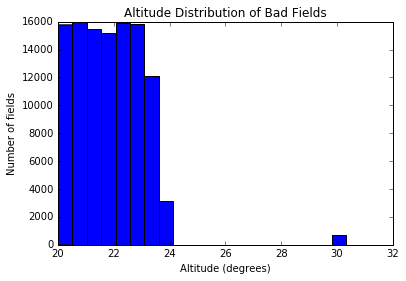

In [71]:
#plt.plot(x, alt_vals)
plt.hist(alt_vals, bins=20)
plt.xlabel("Altitude (degrees)")
plt.ylabel("Number of fields")
plt.title("Altitude Distribution of Bad Fields")